In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

import numpy as np
#패키지 import
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#폰트 설치
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')

In [ ]:
df = df.set_index('관측일시')#인덱스로 설정

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2013-01-05 to 2024-12-28
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가뭄(MSWSI)   626 non-null    float64
 1   가뭄(SPI6)    626 non-null    float64
 2   평균 저수율      626 non-null    float64
 3   평균 용수공급량    626 non-null    float64
 4   평균 강우량      626 non-null    float64
 5   평균기온        626 non-null    float64
 6   평균 유입량-뱡류량  626 non-null    float64
dtypes: float64(7)
memory usage: 39.1+ KB


In [ ]:
df.head(10)

,가뭄(MSWSI),가뭄(SPI6),평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,,,
2013-01-05,0.0,0.0,53.920000,0.693467,0.137613,-9.466667,-0.486933
2013-01-12,-0.5,0.0,51.014286,0.721000,0.000000,-6.942857,-0.558000
2013-01-19,0.0,0.0,48.357143,0.722286,0.000000,-4.957143,-0.524143
2013-01-26,0.0,0.0,45.985714,0.722571,3.638271,-4.571429,-0.523429
2013-02-02,0.5,0.0,43.671429,0.718286,2.076014,-0.828571,-0.222714
2013-02-09,0.0,1.0,44.371429,0.610286,1.276543,-5.642857,0.115857
2013-02-16,0.0,0.0,43.857143,0.622429,0.000000,-4.628571,-0.216714
2013-02-23,-0.5,0.0,42.514286,0.642571,0.066843,-3.414286,-0.320857
2013-03-02,-0.5,0.0,41.028571,0.655429,0.142857,0.828571,-0.198429


In [ ]:
#데이터 분리
target=['가뭄(MSWSI)','가뭄(SPI6)']
X=df.drop(target,axis=1)
y=df[target]
display(X)
display(y)

,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2013-01-05,53.920000,0.693467,0.137613,-9.466667,-0.486933
2013-01-12,51.014286,0.721000,0.000000,-6.942857,-0.558000
2013-01-19,48.357143,0.722286,0.000000,-4.957143,-0.524143
2013-01-26,45.985714,0.722571,3.638271,-4.571429,-0.523429
2013-02-02,43.671429,0.718286,2.076014,-0.828571,-0.222714
...,...,...,...,...,...
2024-11-30,68.400000,0.358571,1.304057,0.885714,-0.131571
2024-12-07,67.742857,0.373571,0.000000,0.942857,-0.177857
2024-12-14,66.757143,0.388429,0.000000,-2.257143,-0.230429


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2013-01-05,0.0,0.0
2013-01-12,-0.5,0.0
2013-01-19,0.0,0.0
2013-01-26,0.0,0.0
2013-02-02,0.5,0.0
...,...,...
2024-11-30,0.5,0.0
2024-12-07,0.0,0.0
2024-12-14,-0.5,0.0


In [ ]:
y[target] = y[target].astype('category')
display(y[target])
y.info()

/tmp/ipython-input-3070427231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[target] = y[target].astype('category')


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2013-01-05,0.0,0.0
2013-01-12,-0.5,0.0
2013-01-19,0.0,0.0
2013-01-26,0.0,0.0
2013-02-02,0.5,0.0
...,...,...
2024-11-30,0.5,0.0
2024-12-07,0.0,0.0
2024-12-14,-0.5,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 2013-01-05 to 2024-12-28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   가뭄(MSWSI)  626 non-null    category
 1   가뭄(SPI6)   626 non-null    category
dtypes: category(2)
memory usage: 6.7+ KB


In [ ]:
#train, test 데이터 나누기
test_size = 52#24년(1년치) 데이터 개수
X_train, X_test = X[:-test_size], X[-test_size:]#독립변수 분할
y_train, y_test = y[:-test_size], y[-test_size:]#종속변수 분할
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(574, 5)
(52, 5)
(574, 2)
(52, 2)


In [ ]:
display(X_train.tail(5))
display(y_train.tail(5))
display(X_test.head(5))
display(y_test.head(5))

,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2023-12-02,63.257143,0.381286,0.352557,-1.728571,-0.291000
2023-12-09,61.942857,0.381571,0.847971,2.757143,-0.257857
2023-12-16,70.014286,0.372143,19.862429,1.700000,2.564429
2023-12-23,65.414286,0.397714,0.000000,-10.214286,-2.223857
2023-12-30,63.257143,0.411429,0.285714,-3.371429,0.061000


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2023-12-02,-0.5,0.0
2023-12-09,0.0,0.0
2023-12-16,2.0,1.0
2023-12-23,1.5,1.0
2023-12-30,0.5,1.0


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2024-01-06,63.128571,0.401714,1.267371,-0.700000,0.038000
2024-01-13,62.571429,0.400429,0.000000,-3.842857,-0.048429
2024-01-20,61.828571,0.392143,5.513757,-1.100000,-0.154286
2024-01-27,61.000000,0.405857,0.142857,-8.471429,-0.118571
2024-02-03,60.042857,0.423429,0.276543,-3.000000,-0.167286


,가뭄(MSWSI),가뭄(SPI6)
관측일시,,
2024-01-06,0.0,1.0
2024-01-13,0.0,0.0
2024-01-20,0.5,0.0
2024-01-27,0.0,0.0
2024-02-03,-0.5,0.0


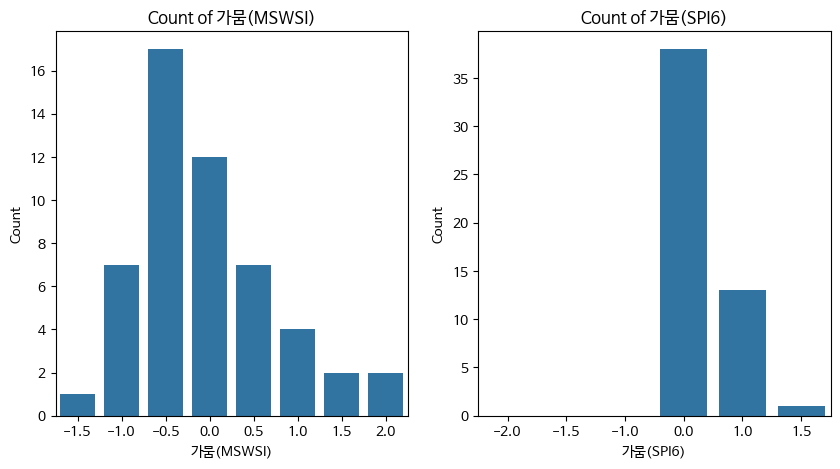

In [ ]:
#종속변수 데이터 확인(이상치 확인)
plt.figure(figsize=(10, 5))
drought=["가뭄(MSWSI)", "가뭄(SPI6)"]#범주형 변수
for i, col in enumerate(drought, 1):
  plt.subplot(1, 2, i)  # 1행 2열 배치
  sns.countplot(x=y_test[col])
  plt.title(f"Count of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
#스케일러 적용
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)#test는 fit하지 않습니다(데이터누수 때문에)

#dataframe으로 변환
X_train_robust   = pd.DataFrame(X_train_robust, columns=X_train.columns, index=X_train.index)
X_test_robust    = pd.DataFrame(X_test_robust, columns=X_test.columns, index=X_test.index)

In [ ]:
#스케일러 적용확인
display(X_train_robust.tail(5))
display(X_test_robust.head(5))


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2023-12-02,-0.863659,0.140671,-0.196367,-0.702542,-0.511178
2023-12-09,-1.050177,0.143586,-0.064407,-0.436441,-0.411436
2023-12-16,0.095286,0.047376,5.000342,-0.499153,8.082115
2023-12-23,-0.557527,0.308309,-0.290275,-1.205932,-6.328031
2023-12-30,-0.863659,0.448251,-0.214171,-0.800000,0.548151


,평균 저수율,평균 용수공급량,평균 강우량,평균기온,평균 유입량-뱡류량
관측일시,,,,,
2024-01-06,-0.881906,0.349125,0.047306,-0.641525,0.478934
2024-01-13,-0.960973,0.336006,-0.290275,-0.827966,0.218831
2024-01-20,-1.066396,0.251458,1.178386,-0.665254,-0.099742
2024-01-27,-1.183984,0.391399,-0.252223,-1.102542,0.007739
2024-02-03,-1.319818,0.570700,-0.216614,-0.777966,-0.138865


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
y_train_ohe  = ohe.fit_transform(y_train[['가뭄(MSWSI)', '가뭄(SPI6)']])
y_test_ohe  = ohe.transform(y_test[['가뭄(MSWSI)', '가뭄(SPI6)']])#test는 fit하지 않습니다(데이터누수 때문에)
encoded_y_train = pd.DataFrame(y_train_ohe, columns=ohe.get_feature_names_out(), index=y_train.index)
encoded_y_test = pd.DataFrame(y_test_ohe, columns=ohe.get_feature_names_out(), index=y_test.index)
display(encoded_y_train)
display(encoded_y_test)

,가뭄(MSWSI)_-1.5,가뭄(MSWSI)_-1.0,가뭄(MSWSI)_-0.5,가뭄(MSWSI)_0.0,가뭄(MSWSI)_0.5,가뭄(MSWSI)_1.0,가뭄(MSWSI)_1.5,가뭄(MSWSI)_2.0,가뭄(SPI6)_-2.0,가뭄(SPI6)_-1.5,가뭄(SPI6)_-1.0,가뭄(SPI6)_0.0,가뭄(SPI6)_1.0,가뭄(SPI6)_1.5
관측일시,,,,,,,,,,,,,,
2013-01-05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-01-26,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013-02-02,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2023-12-09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2023-12-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


,가뭄(MSWSI)_-1.5,가뭄(MSWSI)_-1.0,가뭄(MSWSI)_-0.5,가뭄(MSWSI)_0.0,가뭄(MSWSI)_0.5,가뭄(MSWSI)_1.0,가뭄(MSWSI)_1.5,가뭄(MSWSI)_2.0,가뭄(SPI6)_-2.0,가뭄(SPI6)_-1.5,가뭄(SPI6)_-1.0,가뭄(SPI6)_0.0,가뭄(SPI6)_1.0,가뭄(SPI6)_1.5
관측일시,,,,,,,,,,,,,,
2024-01-06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2024-01-13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2024-01-20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2024-01-27,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2024-02-03,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2024-02-10,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2024-02-17,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2024-02-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2024-03-02,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 변수설명
X_train=독립변수 훈련데이터\
X_test=독립변수 테스트데이터\
y_test=종속변수 테스트데이터(원핫인코딩x)\
y_train=종속변수 훈련데이터(원핫인코딩x)\
encoded_y_trian=종속변수 테스트데이터(원핫인코딩o)\
encoded_y_test=종속변수 테스트데이터(원핫인코딩o)\
=================================================\
훈련데이터는 X_train_robust,encoded_y_train 사용\
테스트 데이터는 X_test_robust,encoded_y_test 사용\
시계열데이터셋\
X_train_win_mswsi\
y_train_win_mswsi\
X_test_win_mswsi\
y_test_win_mswsi\
X_train_win_spi\
y_train_win_spi\
X_test_win_spi\
y_test_win_spi

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, Input, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
#라벨인코딩(원핫 사요안하기로 함)
from sklearn.preprocessing import LabelEncoder

# MSWSI용 encoder
le_mswsi = LabelEncoder()
y_train_mswsi = le_mswsi.fit_transform(y_train['가뭄(MSWSI)'])
y_test_mswsi  = le_mswsi.transform(y_test['가뭄(MSWSI)'])

# SPI6용 encoder
le_spi = LabelEncoder()
y_train_spi = le_spi.fit_transform(y_train['가뭄(SPI6)'])
y_test_spi  = le_spi.transform(y_test['가뭄(SPI6)'])


In [ ]:
#종속변수의 이전시점 데이터
def make_xy_windows_with_y_lag(X, y_idx, time_step=12, horizon=1):

    X = np.asarray(X)
    y_idx = np.asarray(y_idx).reshape(-1,)
    N, F = X.shape

    Xs, Ys = [], []
    for i in range(N - time_step - horizon + 1):
        # 윈도우 구간의 독립변수
        x_win = X[i : i + time_step, :]
        # 같은 구간의 과거 타깃(라벨 인덱스)
        y_lag = y_idx[i : i + time_step].reshape(-1, 1)
        # 붙이기: (T, F+1)
        x_aug = np.concatenate([x_win, y_lag], axis=1)
        # 예측 타깃은 윈도우 끝에서 horizon만큼 뒤
        y_target = y_idx[i + time_step + horizon - 1]

        Xs.append(x_aug)
        Ys.append(y_target)

    return np.asarray(Xs), np.asarray(Ys)

#학습데이터셋 만들기
time_step = 8
horizon = 1

# y1(MSWSI)용 윈도우
X_train_win_mswsi, y_train_win_mswsi = make_xy_windows_with_y_lag(
    X_train_robust.values, y_train_mswsi,
    time_step=time_step, horizon=horizon
)
X_test_win_mswsi,  y_test_win_mswsi  = make_xy_windows_with_y_lag(
    X_test_robust.values,  y_test_mswsi,
    time_step=time_step, horizon=horizon
)

# y2(SPI6)용 윈도우
X_train_win_spi, y_train_win_spi = make_xy_windows_with_y_lag(
    X_train_robust.values, y_train_spi,
    time_step=time_step, horizon=horizon
)
X_test_win_spi,  y_test_win_spi  = make_xy_windows_with_y_lag(
    X_test_robust.values,  y_test_spi,
    time_step=time_step, horizon=horizon
)

print("MSWSI:", X_train_win_mswsi.shape, y_train_win_mswsi.shape)
print("SPI6 :", X_train_win_spi.shape, y_train_win_spi.shape)


MSWSI: (566, 8, 6) (566,)
SPI6 : (566, 8, 6) (566,)


# RNN(종속변수 1개씩)

In [ ]:

from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
n_classes = len(np.unique(y_train_mswsi))

model = Sequential()
model.add(SimpleRNN(64,input_shape=(X_train_win_mswsi.shape[1], X_train_win_mswsi.shape[2]),activation='tanh', return_sequences=True))# RNN
#model.add(SimpleRNN(64, activation='tanh', return_sequences=True))
model.add(SimpleRNN(64, activation='tanh', return_sequences=False))
model.add(Dense(n_classes, activation='softmax'))  # 출력층

model.compile(
    optimizer=RMSprop(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',  # 정수 라벨이면 sparse 사용
    metrics=['accuracy']
)

model.summary()

# 가장 val_loss가 낮을 때 가중치 저장
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss',save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True, verbose=1)

history = model.fit(X_train_win_mswsi, y_train_win_mswsi,validation_data=(X_test_win_mswsi, y_test_win_mswsi),
                    epochs=50,
                    batch_size=32,
                    callbacks=[checkpoint, earlystop],
                    verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_363 (SimpleRNN)      │ (None, 8, 64)          │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_364 (SimpleRNN)      │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,256 (51.78 KB)

 Trainable params: 13,256 (51.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1715 - loss: 1.9781    
Epoch 1: val_loss improved from inf to 1.90720, saving model to best_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.2098 - loss: 1.8759 - val_accuracy: 0.2812 - val_loss: 1.9072
Epoch 2/50
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3722 - loss: 1.4901 
Epoch 2: val_loss improved from 1.90720 to 1.79529, saving model to best_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3709 - loss: 1.4902 - val_accuracy: 0.2396 - val_loss: 1.7953
Epoch 3/50
11/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3281 - loss: 1.5418 
Epoch 3: val_loss did not improve from 1.79529
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3421 - loss: 1.5145 - val_accuracy: 0.1979 - val_loss: 1.8155
Epoch 4/50
11/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3599 - loss: 1.4476 
Epoch 4: val_loss did not improve from 1.79529
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy:

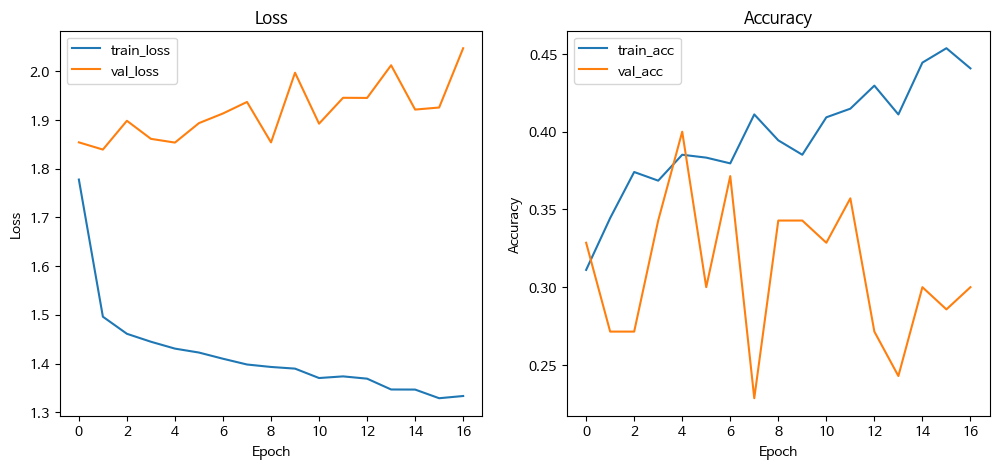

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.12      0.20         8
           2       0.29      0.38      0.33        24
           3       0.24      0.56      0.34        16
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3

    accuracy                           0.27        70
   macro avg       0.13      0.13      0.11        70
weighted avg       0.21      0.27      0.21        70



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 예측
y_pred_prob = model.predict(X_test_win_mswsi)
y_pred = np.argmax(y_pred_prob, axis=1)

# 분류 리포트
print(classification_report(y_test_win_mswsi, y_pred))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


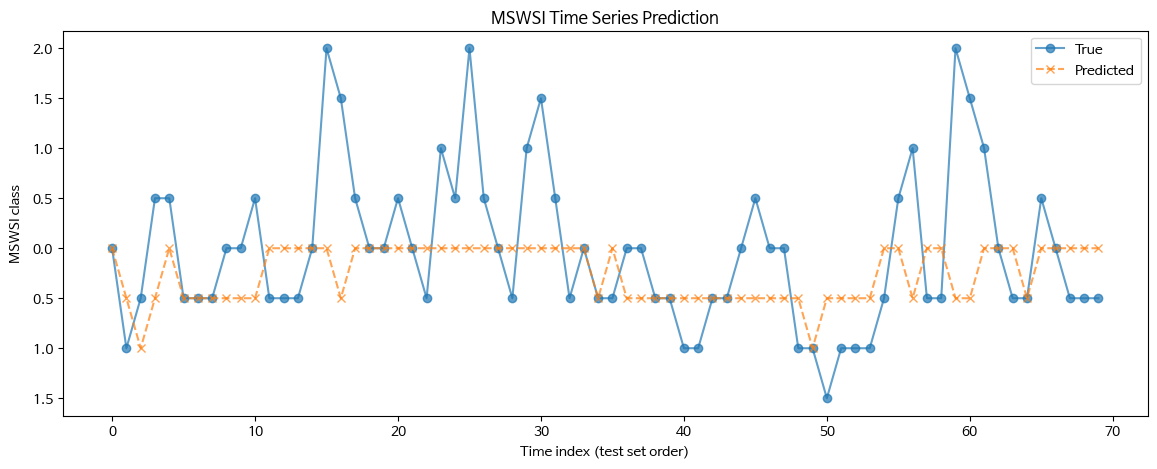

In [ ]:

# 예측
y_pred_prob = model.predict(X_test_win_mswsi)
y_pred = y_pred_prob.argmax(axis=1)        # 클래스 인덱스

# LabelEncoder를 사용했다면 원래 값 복원
y_test_orig = le_mswsi.inverse_transform(y_test_win_mswsi)
y_pred_orig = le_mswsi.inverse_transform(y_pred)
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,5))
plt.plot(y_test_orig, label='True', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred_orig, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.title('MSWSI Time Series Prediction')
plt.xlabel('Time index (test set order)')
plt.ylabel('MSWSI class')
plt.legend()
plt.show()


In [ ]:
#SPI6
n_classes = len(np.unique(y_train_spi))

model = Sequential()
model.add(SimpleRNN(64,input_shape=(X_train_win_mswsi.shape[1], X_train_win_mswsi.shape[2]),activation='tanh', return_sequences=True))# RNN
model.add(SimpleRNN(64, activation='tanh', return_sequences=False))
model.add(Dense(n_classes, activation='softmax'))  # 출력층

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # 정수 라벨이면 sparse 사용
    metrics=['accuracy']
)

model.summary()

# 가장 val_loss가 낮을 때 가중치 저장
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss',save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_loss', patience=15,restore_best_weights=True, verbose=1)

history = model.fit(X_train_win_spi, y_train_win_spi,validation_data=(X_test_win_spi, y_test_win_spi),
                    epochs=50,
                    batch_size=32,
                    callbacks=[checkpoint, earlystop],
                    verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_238 (SimpleRNN)      │ (None, 8, 64)          │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_239 (SimpleRNN)      │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,126 (51.27 KB)

 Trainable params: 13,126 (51.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6220 - loss: 1.1835
Epoch 1: val_loss improved from inf to 1.38429, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6662 - loss: 1.0947 - val_accuracy: 0.7273 - val_loss: 1.3843
Epoch 2/50
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7499 - loss: 0.7935 
Epoch 2: val_loss improved from 1.38429 to 1.06211, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7598 - loss: 0.7901 - val_accuracy: 0.7273 - val_loss: 1.0621
Epoch 3/50
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7517 - loss: 0.8296 
Epoch 3: val_loss did not improve from 1.06211
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7609 - loss: 0.8129 - val_accuracy: 0.7273 - val_loss: 1.2412
Epoch 4/50
11/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7816 - loss: 0.7649 
Epoch 4: val_loss did not improve from 1.06211
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7

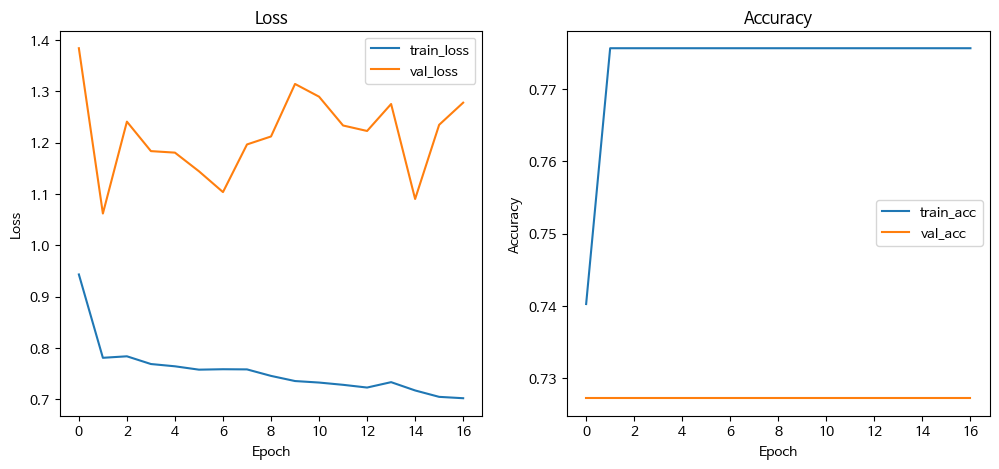

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           3       0.73      1.00      0.84        32
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         1

    accuracy                           0.73        44
   macro avg       0.24      0.33      0.28        44
weighted avg       0.53      0.73      0.61        44



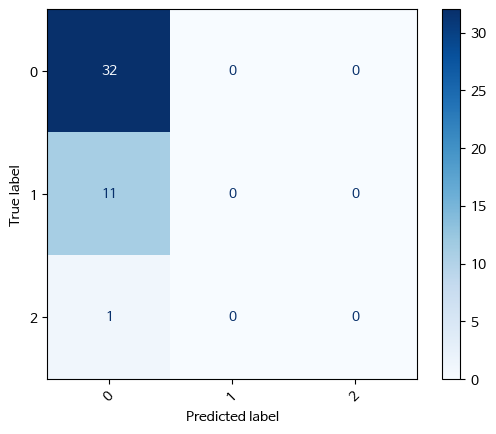

In [ ]:
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 예측
y_pred_prob = model.predict(X_test_win_spi)
y_pred = np.argmax(y_pred_prob, axis=1)

# 분류 리포트
print(classification_report(y_test_win_spi, y_pred))

# 혼동행렬
cm = confusion_matrix(y_test_win_spi, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


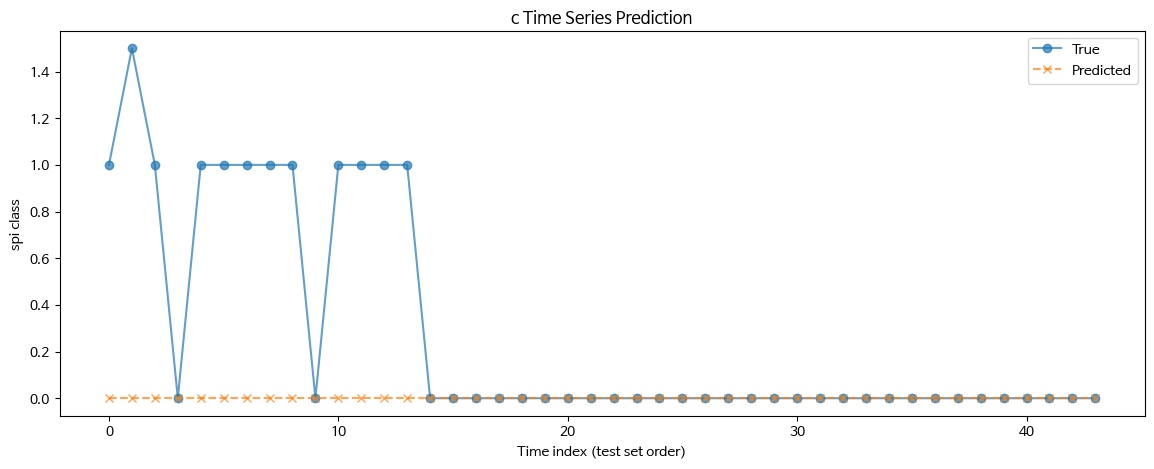

In [ ]:
# 예측
y_pred_prob = model.predict(X_test_win_spi)
y_pred = y_pred_prob.argmax(axis=1)        # 클래스 인덱스

# LabelEncoder를 사용했다면 원래 값 복원
y_test_orig = le_spi.inverse_transform(y_test_win_spi)
y_pred_orig = le_spi.inverse_transform(y_pred)

plt.figure(figsize=(14,5))
plt.plot(y_test_orig, label='True', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred_orig, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.title('c Time Series Prediction')
plt.xlabel('Time index (test set order)')
plt.ylabel('spi class')
plt.legend()
plt.show()



# 가중치 조정 추가_MSWSI



In [ ]:
#가중치 확인_mswsi(학습시 가중치적용)
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train_win_mswsi)#훈련 데이터에 실제로 등장한 클래스 라벨 집합 추출
weights = compute_class_weight(class_weight='balanced',classes=classes, y=y_train_win_mswsi)#클래스별 가중치 계산
class_weight_mswsi = {int(c): float(w) for c, w in zip(classes, weights)}#{클래스: 가중치} 딕셔너리 형태로 변환

print("MSWSI 클래스별 가중치:", class_weight_mswsi)


MSWSI 클래스별 가중치: {0: 23.583333333333332, 1: 0.5279850746268657, 2: 0.39747191011235955, 3: 0.39305555555555555, 4: 1.6079545454545454, 5: 3.5375, 6: 14.15, 7: 35.375}


In [ ]:
#가중치 추가한 모델
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
n_classes = len(np.unique(y_train_win_mswsi))
model = Sequential()
node=16
model.add(SimpleRNN(node,input_shape=(X_train_win_mswsi.shape[1], X_train_win_mswsi.shape[2]),activation='tanh', return_sequences=True))# RNN
#model.add(SimpleRNN(node, activation='tanh', return_sequences=True))
model.add(SimpleRNN(node, activation='tanh', return_sequences=False))
model.add(Dense(node, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))  # 출력층

model.compile(
    optimizer=Adam(learning_rate=0.001),   #학습률
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.summary()
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss',save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=1)

history = model.fit(X_train_win_mswsi, y_train_win_mswsi,validation_data=(X_test_win_mswsi, y_test_win_mswsi),
                    epochs=50,
                    batch_size=16,
                    #callbacks=[checkpoint, earlystop],
                    class_weight=class_weight_mswsi,   # 클래스별 가중치 조정 추가
                    verbose=1)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_68 (SimpleRNN)       │ (None, 8, 16)          │           368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_69 (SimpleRNN)       │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,304 (5.09 KB)

 Trainable params: 1,304 (5.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.0322 - loss: 2.4026 - val_accuracy: 0.0682 - val_loss: 2.2949
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0863 - loss: 2.1253 - val_accuracy: 0.0682 - val_loss: 2.2492
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0925 - loss: 1.7394 - val_accuracy: 0.0682 - val_loss: 2.2067
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1166 - loss: 1.5897 - val_accuracy: 0.0455 - val_loss: 2.1903
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1516 - loss: 1.8182 - val_accuracy: 0.0455 - val_loss: 2.1720
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1590 - loss: 1.6202 - val_accuracy: 0.0455 - val_loss: 2.1674
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1538 - loss: 1.5690 - val_accuracy: 0.0682 - val_loss: 2.1721
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1765 - loss: 1.5037 - val_accuracy: 0.1136 - val

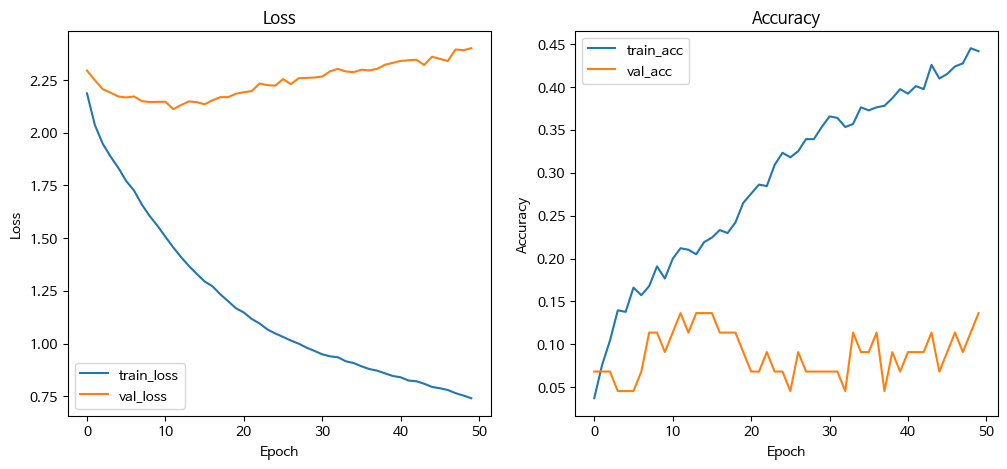

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.20      0.14      0.17         7
           2       0.00      0.00      0.00        16
           3       0.23      0.33      0.27         9
           4       0.08      0.20      0.11         5
           5       0.11      0.33      0.17         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.14        44
   macro avg       0.08      0.13      0.09        44
weighted avg       0.10      0.14      0.11        44



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#시각화
from sklearn.metrics import classification_report
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#성능결과

# 예측
y_pred_prob = model.predict(X_test_win_mswsi)
y_pred = np.argmax(y_pred_prob, axis=1)

# 분류 리포트
print(classification_report(y_test_win_mswsi, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


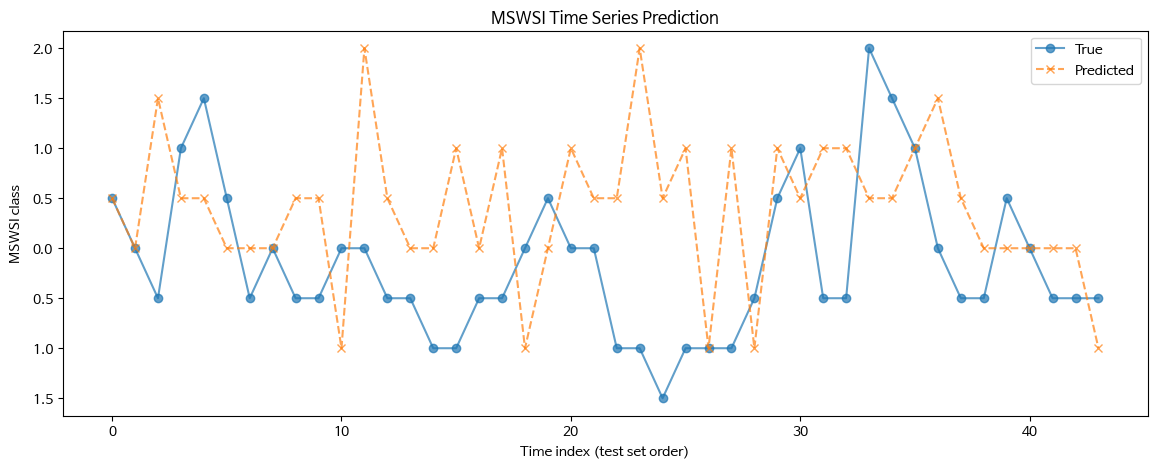

In [ ]:
# 예측
y_pred_prob = model.predict(X_test_win_mswsi)
y_pred = y_pred_prob.argmax(axis=1)        # 클래스 인덱스

#원래 값 복원
y_test_orig = le_mswsi.inverse_transform(y_test_win_mswsi)
y_pred_orig = le_mswsi.inverse_transform(y_pred)
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,5))
plt.plot(y_test_orig, label='True', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred_orig, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.title('MSWSI Time Series Prediction')
plt.xlabel('Time index (test set order)')
plt.ylabel('MSWSI class')
plt.legend()
plt.show()


# 가중치 조정 추가_SPI6

In [ ]:
#가중치 확인_mswsi
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train_win_spi)
weights = compute_class_weight(class_weight='balanced',
                               classes=classes,
                               y=y_train_win_spi)
class_weight_spi = {int(c): float(w) for c, w in zip(classes, weights)}

print("SPI6 클래스별 가중치:", class_weight_spi)


SPI6 클래스별 가중치: {0: 31.444444444444443, 1: 3.1444444444444444, 2: 1.2577777777777779, 3: 0.21488230827638571, 4: 5.2407407407407405, 5: 94.33333333333333}


In [ ]:
#가중치 추가한 모델

model = Sequential()
node=32
model.add(SimpleRNN(node,input_shape=(X_train_win_spi.shape[1], X_train_win_spi.shape[2]),activation='tanh', return_sequences=False))# RNN
#model.add(SimpleRNN(node, activation='tanh', return_sequences=True))
#model.add(SimpleRNN(node, activation='tanh', return_sequences=False))
model.add(Dense(node, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))  # 출력층

model.compile(
    optimizer=Adam(learning_rate=0.001),   #학습률
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss',save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=1)

history = model.fit(X_train_win_spi, y_train_win_spi,validation_data=(X_test_win_spi, y_test_win_spi),
                    epochs=50,
                    batch_size=32,
                    callbacks=[checkpoint, earlystop],
                    class_weight=class_weight_spi,   # 클래스별 가중치 조정 추가
                    verbose=1)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_62 (SimpleRNN)       │ (None, 32)             │         1,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,568 (10.03 KB)

 Trainable params: 2,568 (10.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1027 - loss: 3.4312
Epoch 1: val_loss improved from inf to 2.42615, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.1013 - loss: 3.2039 - val_accuracy: 0.0000e+00 - val_loss: 2.4261
Epoch 2/50
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0866 - loss: 2.4656 
Epoch 2: val_loss improved from 2.42615 to 2.12832, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0876 - loss: 2.4216 - val_accuracy: 0.0000e+00 - val_loss: 2.1283
Epoch 3/50
15/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1224 - loss: 1.8447 
Epoch 3: val_loss improved from 2.12832 to 1.96739, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1316 - loss: 1.8464 - val_accuracy: 0.0227 - val_loss: 1.9674
Epoch 4/50
12/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2799 - loss: 1.3685 
Epoch 4: val_loss improved from 1.96739 to 1.88817, sav

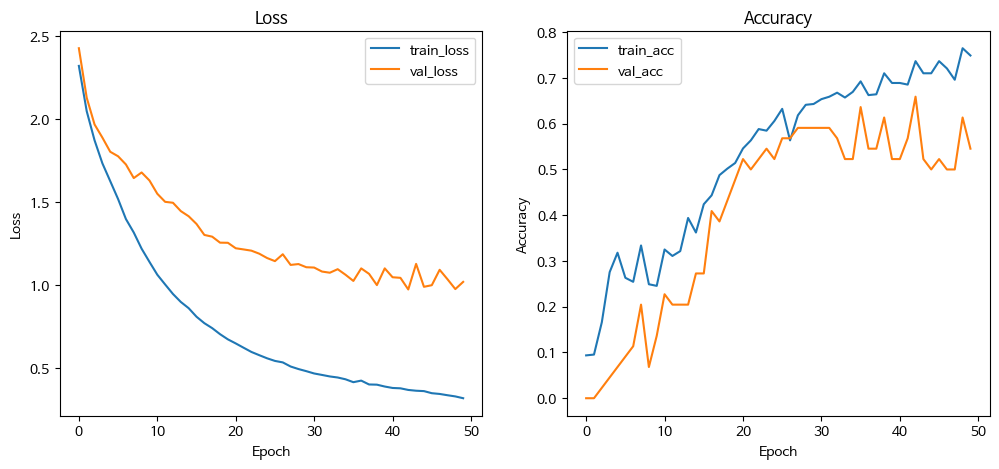

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.65      0.47      0.55        32
           4       0.43      0.27      0.33        11
           5       0.00      0.00      0.00         1

    accuracy                           0.41        44
   macro avg       0.22      0.15      0.18        44
weighted avg       0.58      0.41      0.48        44



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#시각화
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#성능결과

# 예측
y_pred_prob = model.predict(X_test_win_mswsi)
y_pred = np.argmax(y_pred_prob, axis=1)

# 분류 리포트
print(classification_report(y_test_win_spi, y_pred))




2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


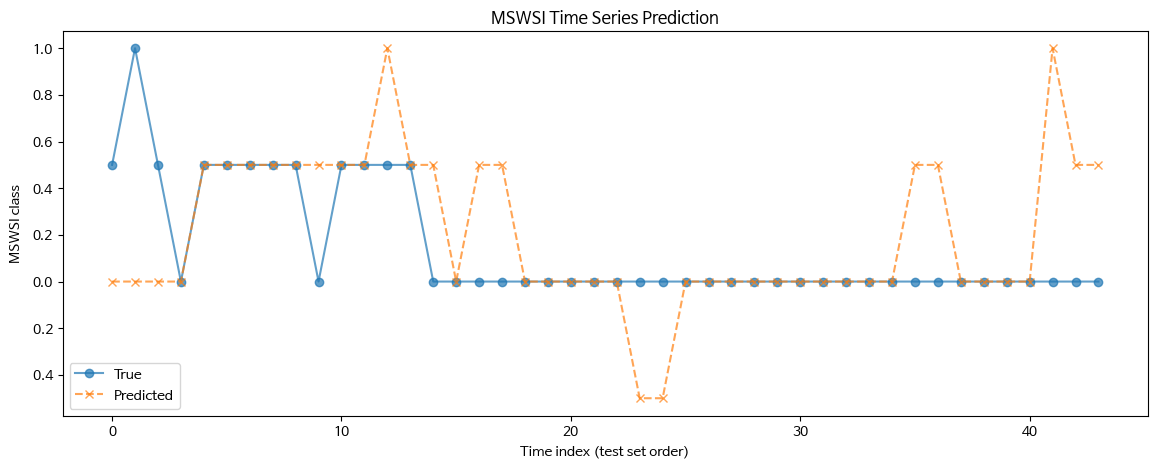

In [ ]:
# 예측
y_pred_prob = model.predict(X_test_win_spi)
y_pred = y_pred_prob.argmax(axis=1)        # 클래스 인덱스

# 원래 값 복원
y_test_orig = le_mswsi.inverse_transform(y_test_win_spi)
y_pred_orig = le_mswsi.inverse_transform(y_pred)

plt.figure(figsize=(14,5))
plt.plot(y_test_orig, label='True', marker='o', linestyle='-', alpha=0.7)
plt.plot(y_pred_orig, label='Predicted', marker='x', linestyle='--', alpha=0.7)
plt.title('MSWSI Time Series Prediction')
plt.xlabel('Time index (test set order)')
plt.ylabel('MSWSI class')
plt.legend()
plt.show()


# 다중출력RNN

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np


#  클래스 개수 (train 분포 기준)
n_class_mswsi = len(np.unique(y_train_win_mswsi))
n_class_spi   = len(np.unique(y_train_win_spi))

#  입력 정의
inp = Input(shape=(X_train_win_mswsi.shape[1], X_train_win_mswsi.shape[2]))

#  공통 RNN 인코더 + 은닉층
x = SimpleRNN(64, activation='tanh')(inp)
x = Dense(64, activation='relu')(x)

#  출력 헤드 (MSWSI / SPI6)
out_mswsi = Dense(n_class_mswsi, activation='softmax', name='mswsi')(x)
out_spi   = Dense(n_class_spi,   activation='softmax', name='spi')(x)

# 모델
model = Model(inputs=inp, outputs=[out_mswsi, out_spi])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss={'mswsi': 'sparse_categorical_crossentropy','spi':   'sparse_categorical_crossentropy'},
    metrics={'mswsi': 'accuracy','spi':   'accuracy'})

model.summary()

# 콜백
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

#학습
history = model.fit(
    X_train_win_mswsi,           #입력
    {'mswsi': y_train_win_mswsi, 'spi': y_train_win_spi},   # 두 타깃
    validation_data=(X_test_win_mswsi,
                     {'mswsi': y_test_win_mswsi, 'spi': y_test_win_spi}),
    epochs=50,
    batch_size=32,
    callbacks=[checkpoint, earlystop],
    verbose=1
)


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 8, 5)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_16       │ (None, 64)        │      4,480 │ input_layer_7[0]… │
│ (SimpleRNN)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │      4,160 │ simple_rnn_16[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mswsi (Dense)       │ (None, 8)         │        520 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spi (Dense)         │ (None, 6)         │        390 │ dense_7[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,550 (37.30 KB)

 Trainable params: 9,550 (37.30 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1240 - mswsi_accuracy: 0.2687 - mswsi_loss: 1.9377 - spi_accuracy: 0.4878 - spi_loss: 1.1863
Epoch 1: val_loss improved from inf to 2.90992, saving model to best_model.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 3.0669 - mswsi_accuracy: 0.2722 - mswsi_loss: 1.9153 - spi_accuracy: 0.5167 - spi_loss: 1.1504 - val_loss: 2.9099 - val_mswsi_accuracy: 0.3409 - val_mswsi_loss: 1.8457 - val_spi_accuracy: 0.7273 - val_spi_loss: 0.8251
Epoch 2/50
16/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4363 - mswsi_accuracy: 0.2713 - mswsi_loss: 1.5693 - spi_accuracy: 0.7481 - spi_loss: 0.8671 
Epoch 2: val_loss did not improve from 2.90992
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4186 - mswsi_accuracy: 0.2733 - mswsi_loss: 1.5628 - spi_accuracy: 0.7524 - spi_loss: 0.8551 - val_loss: 3.0336 - val_mswsi_accuracy: 0.2727 - val_mswsi_loss: 1.9415 - val_spi_accuracy: 0.7273 - val_spi_loss: 0.8730
Epoch 3/50
13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2906 - mswsi_accuracy: 0.2975 - mswsi_loss: 1.5268 - spi_accuracy: 0.7868 - spi_loss: 0.7637 
Epoch 3: val_loss did not improve from 2.90992
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.2859 - mswsi_accur

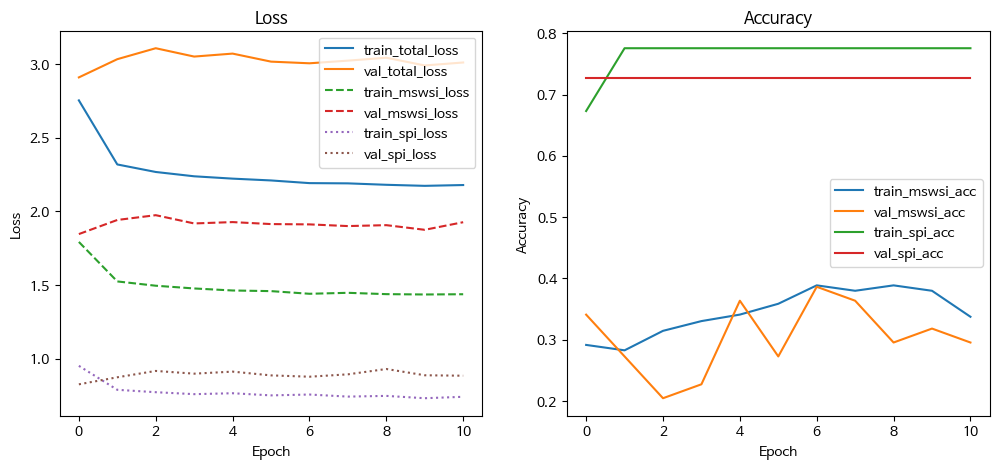

In [ ]:
#  Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_total_loss')
plt.plot(history.history['val_loss'], label='val_total_loss')
plt.plot(history.history['mswsi_loss'], label='train_mswsi_loss', linestyle='--')
plt.plot(history.history['val_mswsi_loss'], label='val_mswsi_loss', linestyle='--')
plt.plot(history.history['spi_loss'], label='train_spi_loss', linestyle=':')
plt.plot(history.history['val_spi_loss'], label='val_spi_loss', linestyle=':')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

#  Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['mswsi_accuracy'], label='train_mswsi_acc')
plt.plot(history.history['val_mswsi_accuracy'], label='val_mswsi_acc')
plt.plot(history.history['spi_accuracy'], label='train_spi_acc')
plt.plot(history.history['val_spi_accuracy'], label='val_spi_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
MSWSI Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         7
           2       0.37      0.94      0.53        16
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.34        44
   macro avg       0.05      0.12      0.07        44
weighted avg       0.13      0.34      0.19        44



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


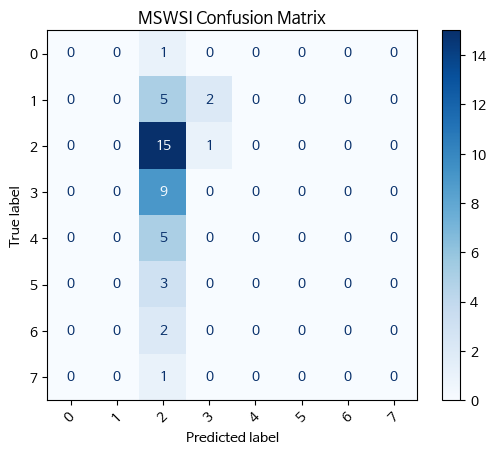

SPI6 Classification Report
              precision    recall  f1-score   support

           3       0.73      1.00      0.84        32
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         1

    accuracy                           0.73        44
   macro avg       0.24      0.33      0.28        44
weighted avg       0.53      0.73      0.61        44



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


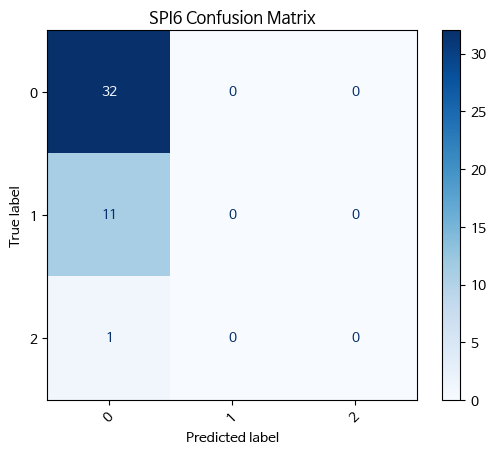

In [ ]:
# 예측
pred_mswsi, pred_spi = model.predict(X_test_win_mswsi)
y_pred_mswsi = np.argmax(pred_mswsi, axis=1)
y_pred_spi   = np.argmax(pred_spi, axis=1)

# MSWSI
print("MSWSI Classification Report")
print(classification_report(y_test_win_mswsi, y_pred_mswsi))
cm_m = confusion_matrix(y_test_win_mswsi, y_pred_mswsi)
ConfusionMatrixDisplay(cm_m).plot(cmap='Blues', xticks_rotation=45)
plt.title('MSWSI Confusion Matrix')
plt.show()

# SPI6
print("SPI6 Classification Report")
print(classification_report(y_test_win_spi, y_pred_spi))
cm_s = confusion_matrix(y_test_win_spi, y_pred_spi)
ConfusionMatrixDisplay(cm_s).plot(cmap='Blues', xticks_rotation=45)
plt.title('SPI6 Confusion Matrix')
plt.show()


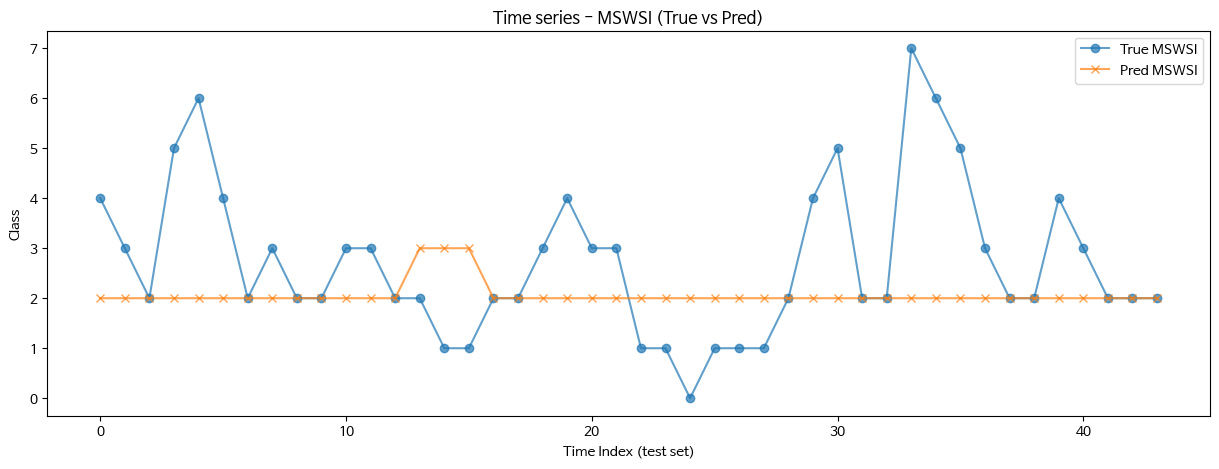

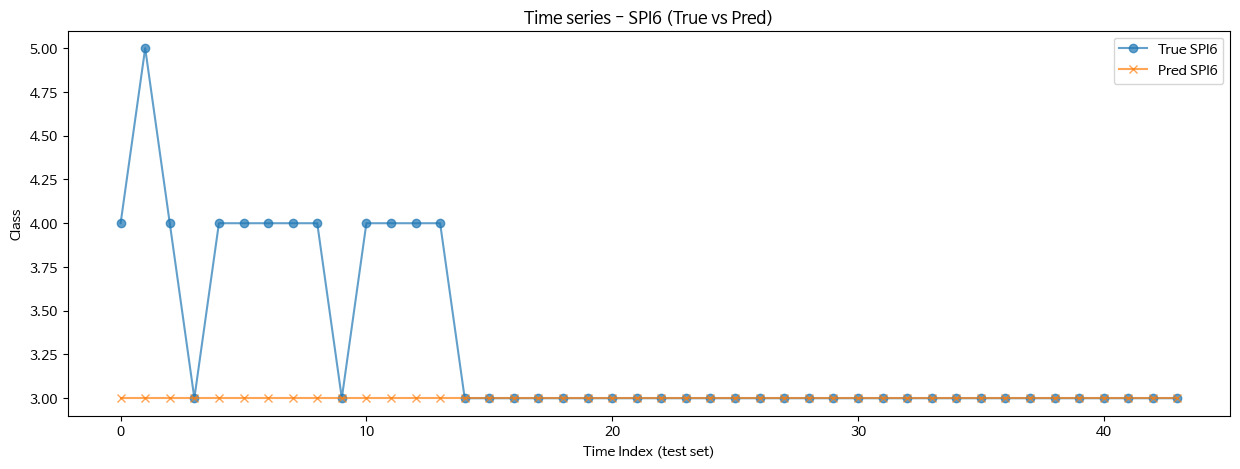

In [ ]:
# 시계열 비교 (예: MSWSI)
plt.figure(figsize=(15,5))
plt.plot(y_test_win_mswsi, label='True MSWSI', marker='o', alpha=0.7)
plt.plot(y_pred_mswsi,     label='Pred MSWSI', marker='x', alpha=0.7)
plt.title("Time series - MSWSI (True vs Pred)")
plt.xlabel("Time Index (test set)")
plt.ylabel("Class")
plt.legend()
plt.show()

# SPI6도 동일하게
plt.figure(figsize=(15,5))
plt.plot(y_test_win_spi, label='True SPI6', marker='o', alpha=0.7)
plt.plot(y_pred_spi,     label='Pred SPI6', marker='x', alpha=0.7)
plt.title("Time series - SPI6 (True vs Pred)")
plt.xlabel("Time Index (test set)")
plt.ylabel("Class")
plt.legend()
plt.show()
